# Практическая задача

1. Загрузить реальные данные Iris для задачи классификации
2. Обучить модель RandomForestClassifier
3. Определить важность признаков
4. Визуализировать результаты в виде бар-чарта.

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset = load_iris()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
rf = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=6)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix\n:", confusion_matrix(y_test,y_pred))

Accuracy: 1.0
Confusion matrix
: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importance:\n", importances)

Feature importance:
 [0.1016855  0.03558197 0.44774405 0.41498849]


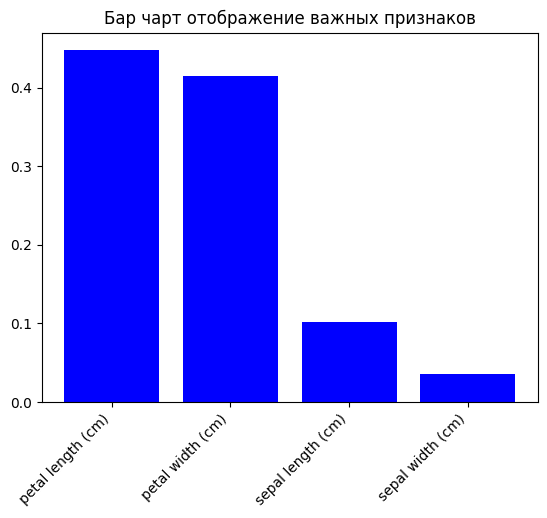

In [26]:
plt.bar(range(X.shape[1]), importances[indices], color='blue')
plt.xticks(range(X.shape[1]), [dataset.feature_names[i] for i in indices], rotation=45, ha='right')
plt.title('Бар чарт отображение важных признаков')
plt.show()